# 2-1 Unsupervised Learning Algorithms-Hierarchical Clustering 

#### ClimateWins wants to see if any associations can be found in the temperature data that may point to new insights into how the weather has changed over the past 60 years.  
##### Find some insights that will help ClimateWins determine what changes it needs to pay attention to.

##### ClimateWins wants to see how data is clustered by an unsupervised learning algorithm compared with its database of “pleasant weather.” 
Are there any connections that stand out among the weather stations from which data has been collected?  
Scale data, plot dendrograms with single, complete, average, and ward methods & confusion matrix  


### Table of Contents
[Import Libraries and data](#Import-Libraries-and-data)  
[Dendrogram](#Dendrogram)  
[How much dendrogram categories correspond to pleasant weather?](#How-much-dendrogram-categories-correspond-to-pleasant-weather?)   
[Dimensionality Reduction](#Dimensionality-Reduction)  



### Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [2]:
path = r'C:\Users\jinu5\Desktop\careerfoundry\ML\DataSet\original data'

In [3]:
df = pd.read_csv(os.path.join(path, 'df_cleaned.csv'), index_col=False)

In [4]:
# For comparing with unsupervised model results, reading the dataset which includes 'What day was pleasant in each locations?'
df_y = pd.read_csv(os.path.join(path, 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col=False)

In [5]:
# listing the location names from df
locations = list({x.split("_")[0] for x in df.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [9]:
#creating a sub-data frame with 2011 ~ 2020 records
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y%m%d')
dfyear = df[(df['DATE'].dt.year >= 2011) & (df['DATE'].dt.year <= 2020)]

In [10]:
dfyear.shape

(3653, 136)

In [11]:
df_y['DATE'] = pd.to_datetime(df_y['DATE'], format='%Y%m%d')
df_y10 = df_y[(df_y['DATE'].dt.year >= 2011) & (df_y['DATE'].dt.year <= 2020)]


In [12]:
df_y10.shape

(3653, 16)

In [13]:
dfyear=dfyear.drop(['DATE'], axis=1)
df_y10 = df_y10.drop(['DATE'], axis=1)

In [14]:
print(dfyear.shape, df_y10.shape)

(3653, 135) (3653, 15)


In [15]:
df_y_np = df_y10.to_numpy()


#### Scale your data using the standardscaler method and save it to a new dataframe.  

In [17]:
scaler = StandardScaler()
scaler.fit(dfyear)
dfyear_s=scaler.transform(dfyear)

In [19]:
print(dfyear_s)

[[ 1.15928429e+00  1.96724173e+00  6.82863287e-01 ...  1.77635684e-15
  -8.88178420e-16 -1.61877810e+01]
 [ 1.15928429e+00  1.71142444e+00  7.08036097e-01 ...  1.77635684e-15
  -8.88178420e-16 -1.90156013e+01]
 [-5.93013430e-01  1.62615201e+00  9.59764195e-01 ...  1.77635684e-15
  -8.88178420e-16 -2.11364665e+01]
 ...
 [ 2.83135431e-01  5.97583961e-03 -2.92943492e+00 ...  1.77635684e-15
  -8.88178420e-16  7.21856671e-02]
 [ 2.83135431e-01  9.43972570e-01 -1.36872071e+00 ...  1.77635684e-15
  -8.88178420e-16  7.21856671e-02]
 [ 7.21209862e-01  1.02924500e+00 -1.36872071e+00 ...  1.77635684e-15
  -8.88178420e-16  7.21856671e-02]]


### Dendrogram
[Go back to the Table of Contents](#Table-of-Contents)

#### Create a dendrogram for the weather data using each of the four methods: single, complete, average, and ward. Record how many clusters you find using each method. 

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

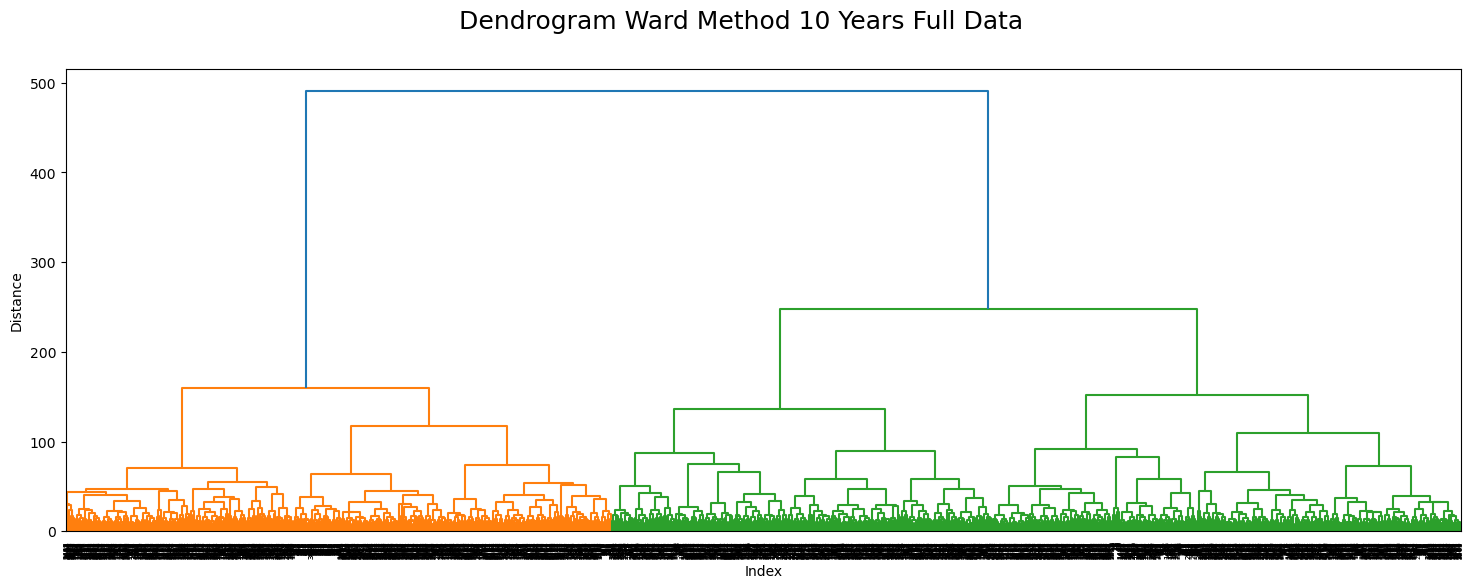

In [21]:
ward = linkage(dfyear_s,method="ward")
plt.figure(figsize=(18,6))
dendrogram(ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method 10 Years Full Data",fontsize=18)
plt.savefig('dendrogram_ward_method_cleaned_data_10years.png')
plt.show()


In [22]:
dfyear_copy=dfyear.copy()

In [23]:
from scipy.cluster.hierarchy import fcluster

dfyear_copy['cluster2'] = fcluster(ward, 2, criterion = 'maxclust') -1

In [24]:
dfyear_copy.describe()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,cluster2
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,...,3653.0,3.653000e+03,3.653000e+03,3653.000000,3.653000e+03,3.653000e+03,3.653000e+03,3.653000e+03,3653.000000,3653.000000
mean,5.353682,0.739299,1.017775,1.465746,0.221599,5.024884,11.504462,7.132658,16.214180,3.834383,...,5.0,8.200000e-01,1.014200e+00,1.120495,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,13.469368,0.608541
std,2.283030,0.117287,0.007946,0.923146,0.487476,4.500597,7.304550,6.404757,8.641344,2.632616,...,0.0,3.764171e-14,4.841235e-14,0.816489,1.882086e-14,2.225192e-13,3.908520e-14,4.832352e-13,0.424413,0.488144
min,0.000000,0.360000,0.982700,0.120000,0.000000,0.000000,-12.400000,-19.300000,-8.800000,0.000000,...,5.0,8.200000e-01,1.014200e+00,0.020000,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,4.500000,0.000000
25%,4.000000,0.660000,1.013200,0.660000,0.000000,0.500000,5.700000,2.100000,9.500000,2.000000,...,5.0,8.200000e-01,1.014200e+00,0.430000,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,13.500000,0.000000
50%,6.000000,0.750000,1.017500,1.320000,0.000000,4.300000,11.500000,7.200000,16.400000,4.000000,...,5.0,8.200000e-01,1.014200e+00,1.060000,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,13.500000,1.000000
75%,7.000000,0.830000,1.022600,2.220000,0.210000,8.700000,17.100000,12.300000,22.900000,6.000000,...,5.0,8.200000e-01,1.014200e+00,1.590000,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,13.500000,1.000000
max,8.000000,0.990000,1.044600,3.890000,5.440000,16.800000,29.200000,22.400000,37.400000,9.000000,...,5.0,8.200000e-01,1.014200e+00,3.650000,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,13.500000,1.000000


In [ ]:
Dendrogram & Confusion Matrix for Each Observatory

In [35]:
sub_dfs = {}
df_ward ={}
# Loop through each location and create a sub-dataframe
for location in locations:
    # Filter columns for the current location
    location_columns = [col for col in dfyear.columns if col.startswith(location)]
    # Create a new dataframe with these columns
    sub_dfs[f'df_{location}'] = dfyear[location_columns]
    ward = linkage(sub_dfs[f'df_{location}'],method="ward")
    df_ward[f'df_{location}']= fcluster(ward, 2, criterion = 'maxclust') -1

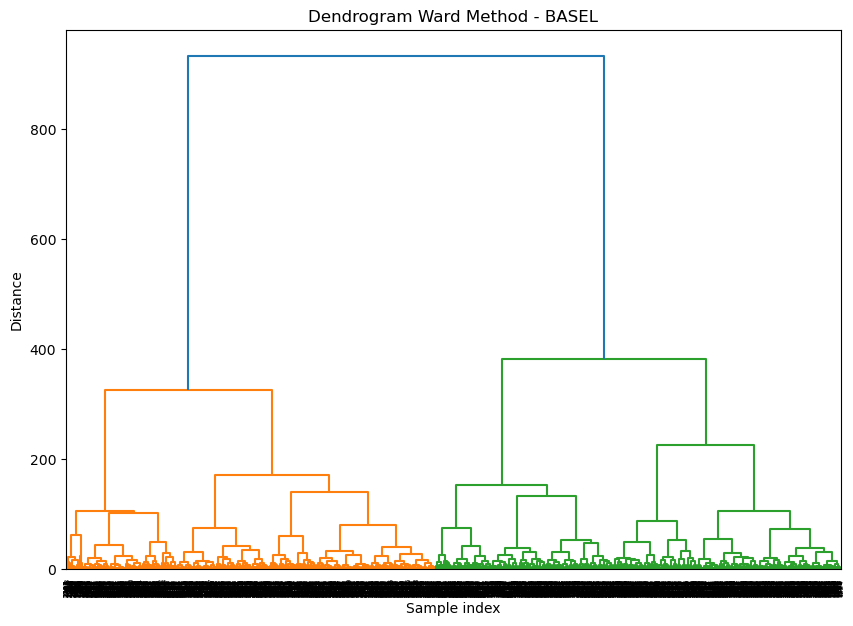

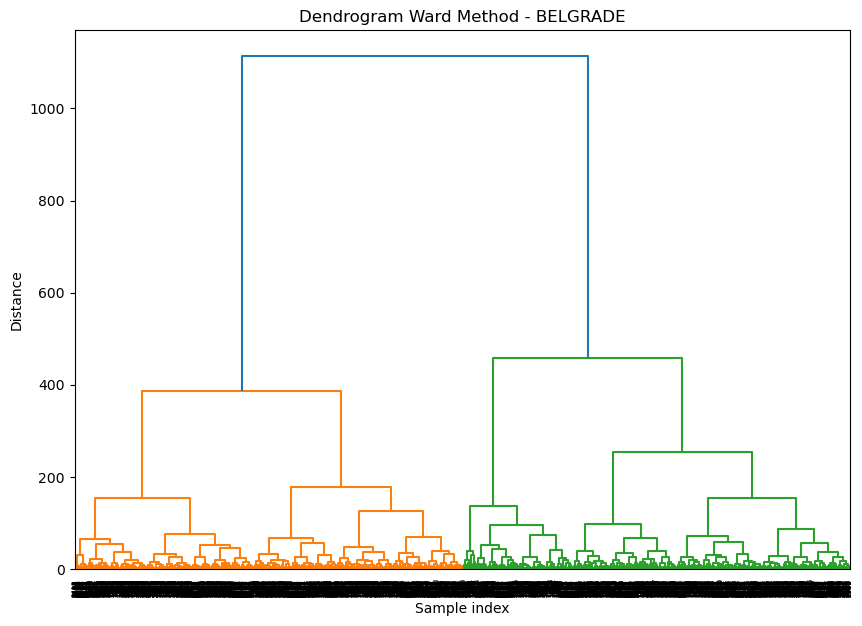

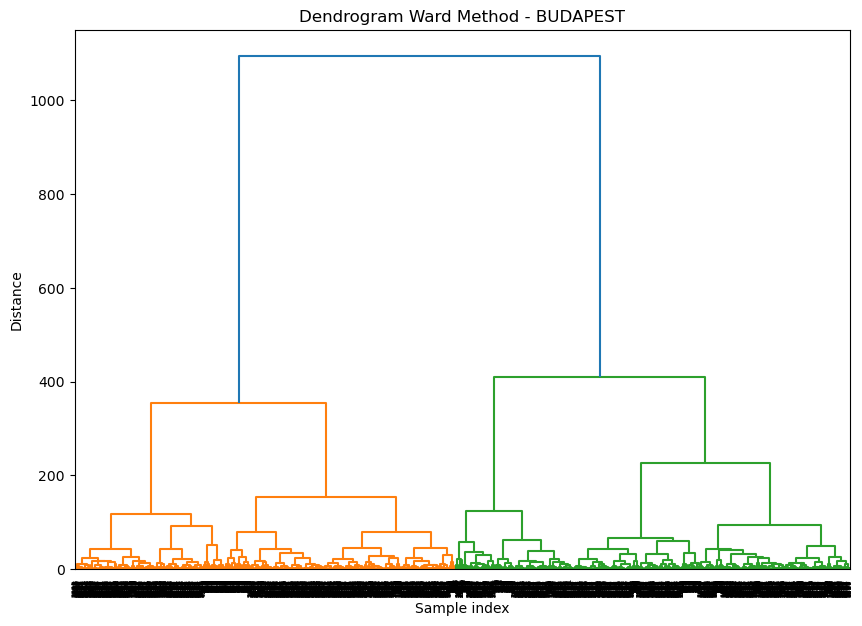

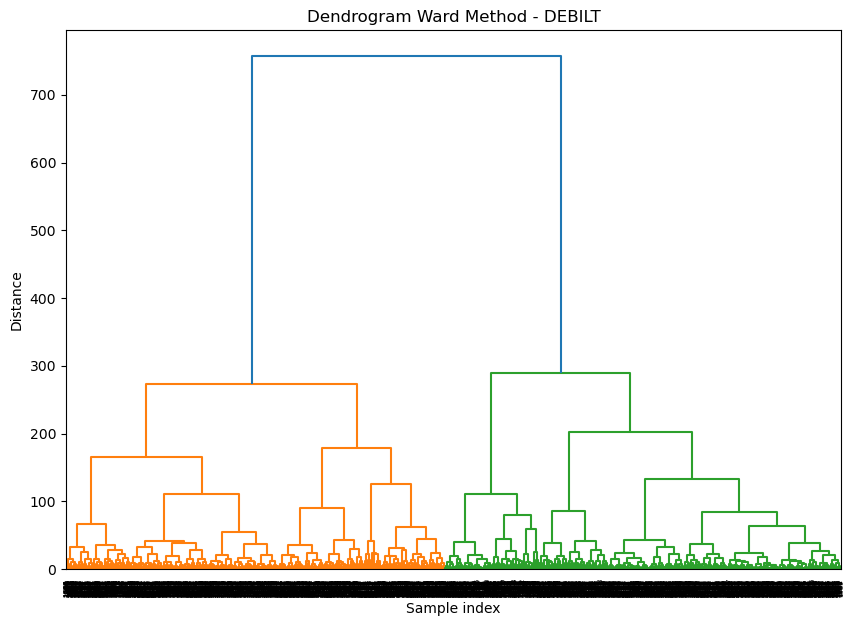

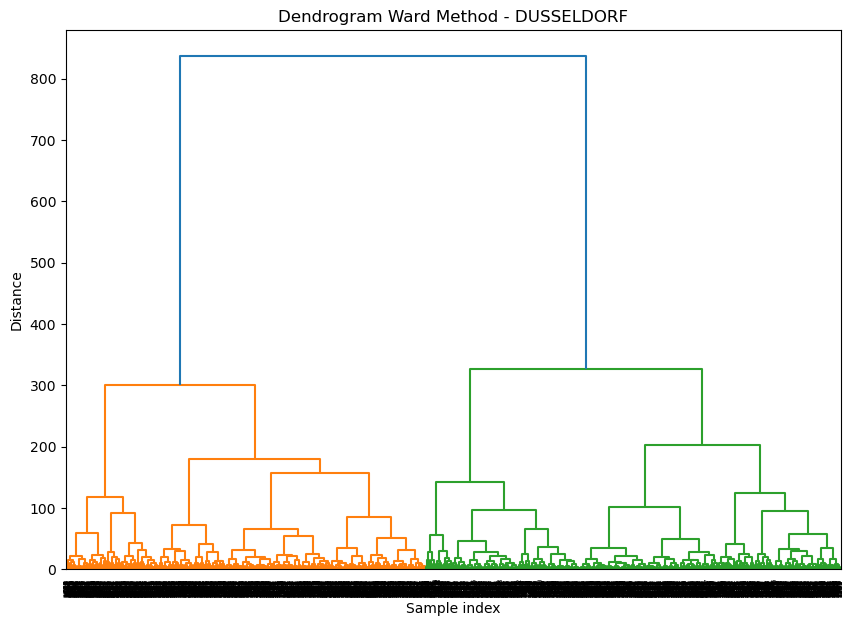

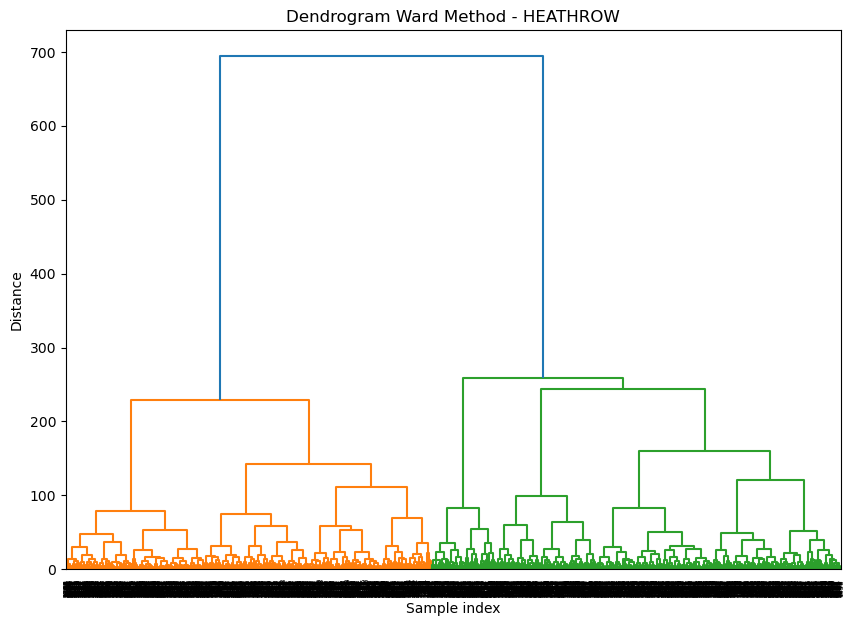

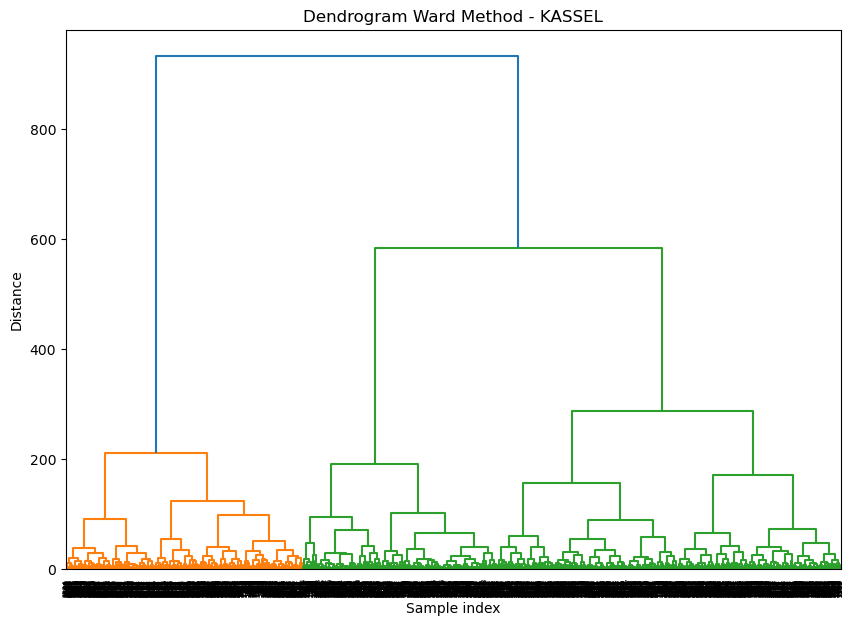

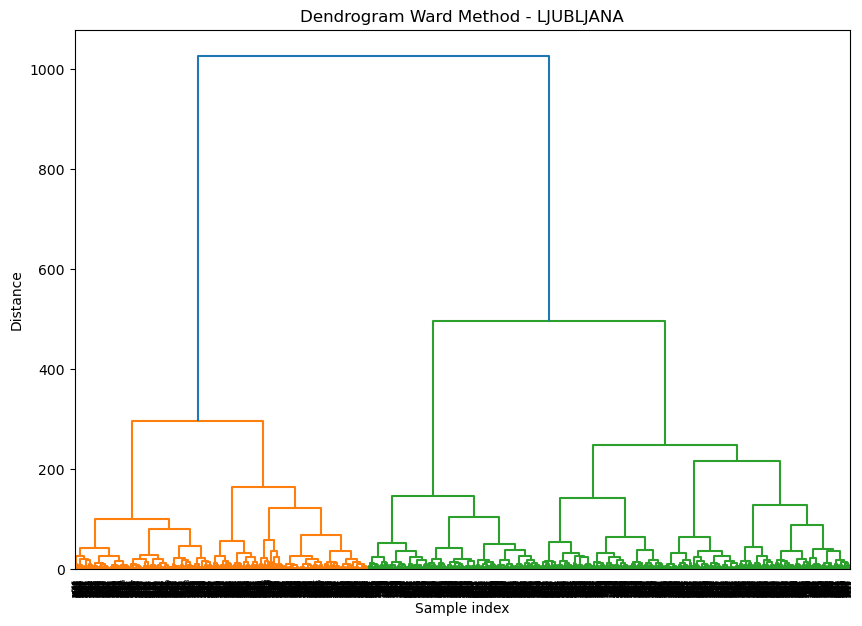

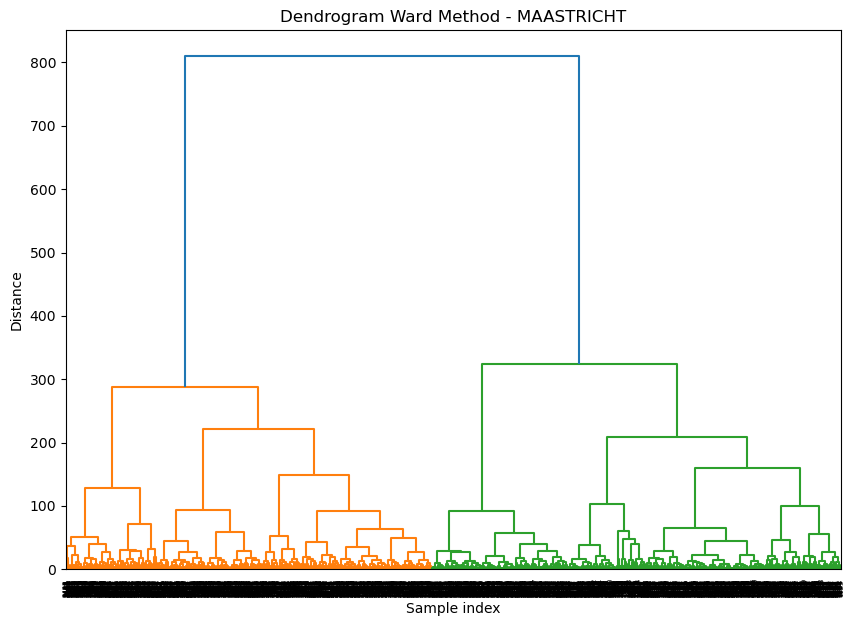

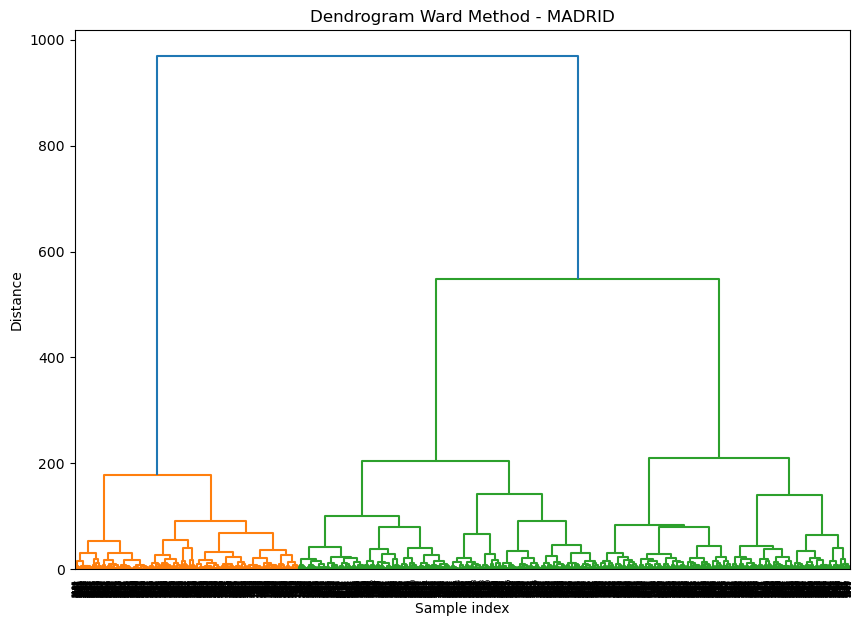

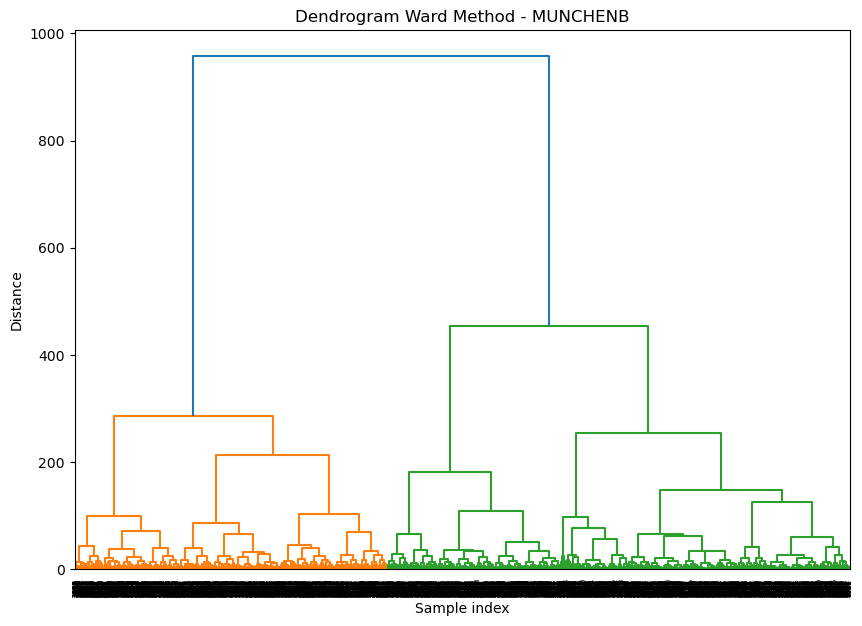

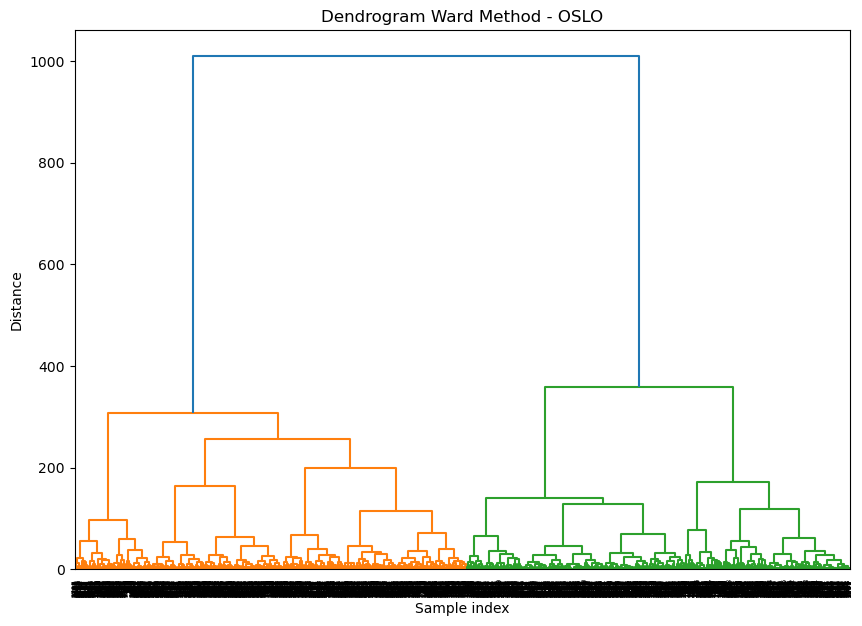

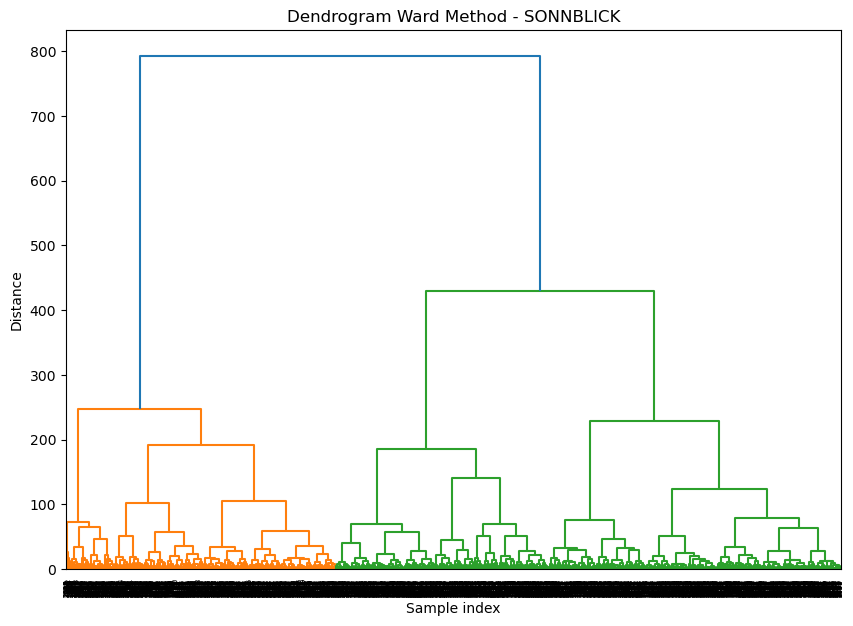

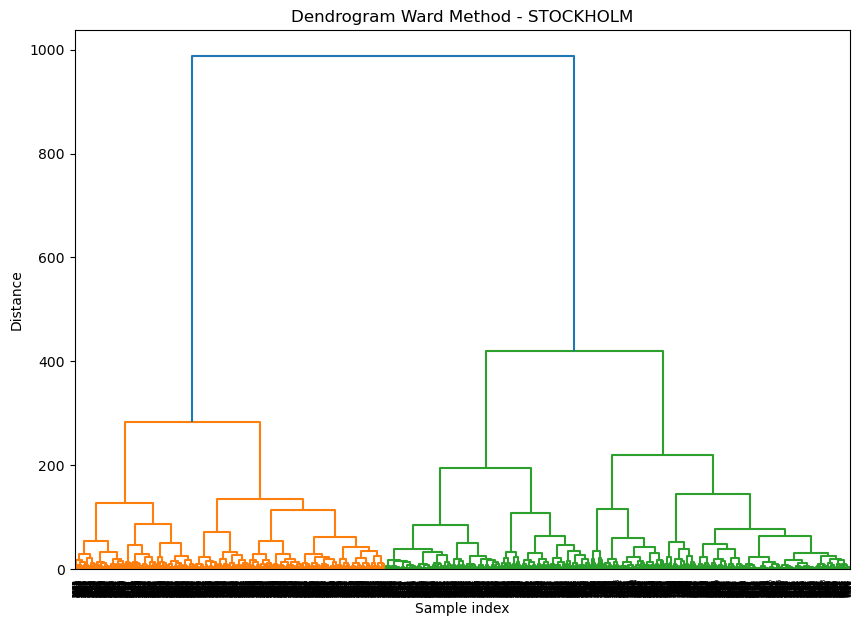

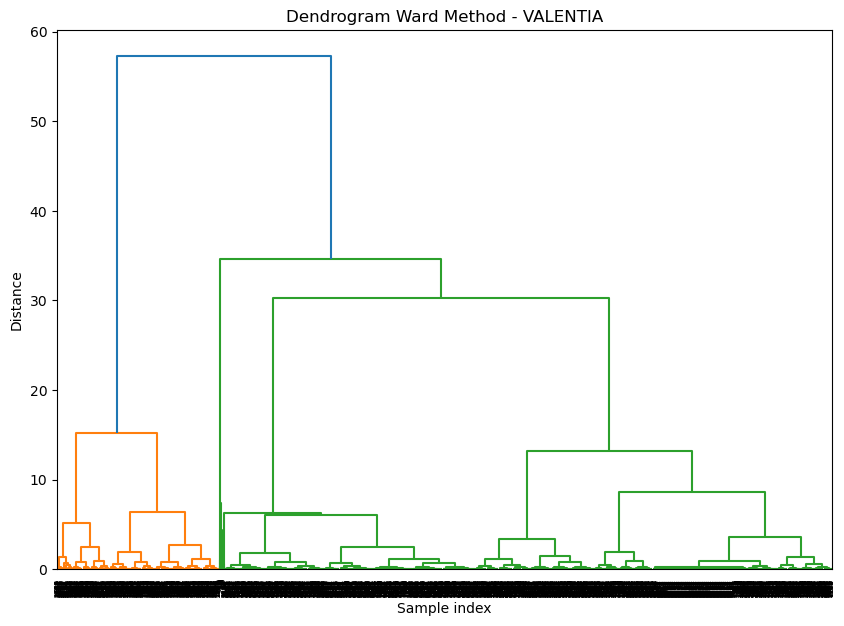

In [36]:
sub_dfs = {}
df_ward = {}
# Loop through each location and create a sub-dataframe
for location in locations:
    # Filter columns for the current location
    location_columns = [col for col in dfyear.columns if col.startswith(location)]
    # Create a new dataframe with these columns
    sub_dfs[f'df_{location}'] = dfyear[location_columns]
    # Perform hierarchical clustering using the Ward method
    ward = linkage(sub_dfs[f'df_{location}'], method="ward")
    # Assign clusters
    df_ward[f'df_{location}'] = fcluster(ward, 2, criterion='maxclust') - 1
    # Plot dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(ward)
    plt.title(f'Dendrogram Ward Method - {location}')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    # Save the dendrogram to a file
    plt.savefig(f'Dendrogram_Ward_Method_{location}.png')
    plt.show() 

## How much dendrogram categories correspond to pleasant weather? 
[Go back to Table of Contents](#Table-of-Contents)

In [37]:
# Calculate the number of clusters and the number of data points from the example
num_clusters = max([max(clusters) for clusters in df_ward.values()])  # Assuming the same number of clusters in each
num_data_points = len(next(iter(df_ward.values())))  # Assuming the same length of arrays

# Create an empty array filled with zeros, of shape (num_data_points, num_locations * num_clusters)
cluster_matrix = np.zeros((num_data_points, len(df_ward) * num_clusters), dtype=np.int64)

# Populate the matrix
for idx, (key, clusters) in enumerate(df_ward.items()):
    # Assuming that each location has the same number of clusters, we can calculate the starting column index for each location
    start_col_idx = idx * num_clusters
    for i, cluster in enumerate(clusters):
        # Set the corresponding column for the cluster to 1
        cluster_matrix[i, start_col_idx + (cluster - 1)] = 1  # Adjust for 0-indexing

cluster_matrix

array([[0, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 1, 1]], dtype=int64)

In [38]:
cluster_matrix.shape

(3653, 15)

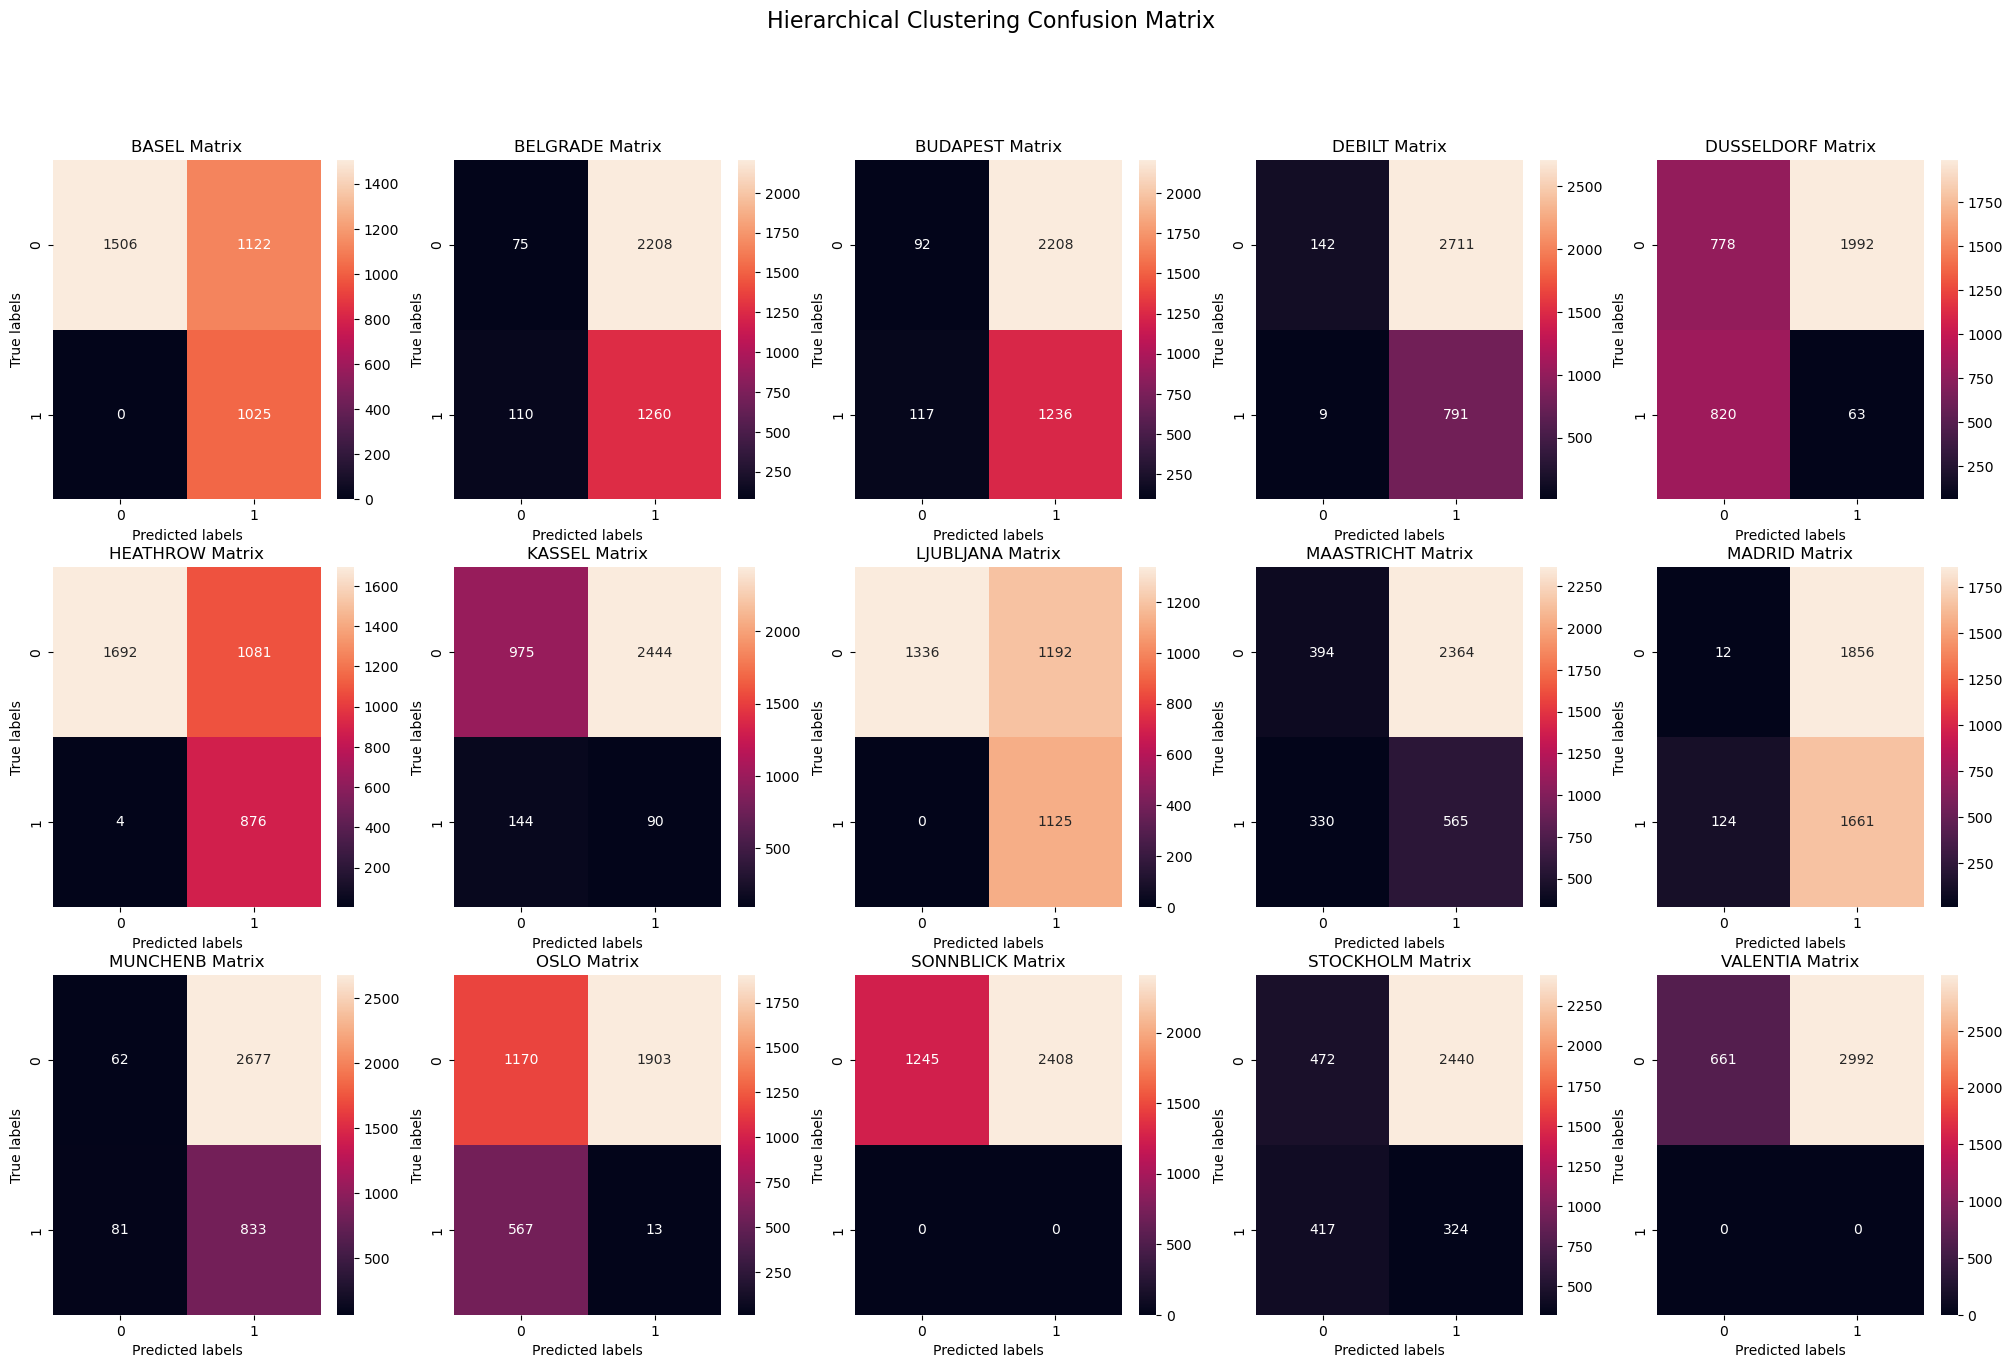

In [40]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
figure.suptitle('Hierarchical Clustering Confusion Matrix', fontsize=16)

labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(df_y10.loc[:,name+key], cluster_matrix[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        count+=1
plt.savefig('Hierarchical_confusion_matrix_scaled_클린데이터10년.png', bbox_inches='tight')
plt.show() 

In [41]:
total_accuracy = 0
for count in range(len(locations)):
    name = locations[count]
    y_true = df_y10.loc[:,name+key]
    y_pred = cluster_matrix[:,count]
    acc = accuracy_score(y_true, y_pred)
    total_accuracy += acc
    print(f"Accuracy for {name}: {acc:.2f}")

average_accuracy = total_accuracy / len(locations_B)
print(f"Average Accuracy: {average_accuracy:.2f}")

Accuracy for BASEL: 0.69
Accuracy for BELGRADE: 0.37
Accuracy for BUDAPEST: 0.36
Accuracy for DEBILT: 0.26
Accuracy for DUSSELDORF: 0.23
Accuracy for HEATHROW: 0.70
Accuracy for KASSEL: 0.29
Accuracy for LJUBLJANA: 0.67
Accuracy for MAASTRICHT: 0.26
Accuracy for MADRID: 0.46
Accuracy for MUNCHENB: 0.25
Accuracy for OSLO: 0.32
Accuracy for SONNBLICK: 0.34
Accuracy for STOCKHOLM: 0.22
Accuracy for VALENTIA: 0.18
Average Accuracy: 0.37


## Dimensionality Reduction
[Go back to the Table of Contents](#Table-of-Contents) 


In [47]:
#Run the PCA model, reducing 147 to 2 components
from sklearn.decomposition import PCA

pca_2 = PCA(n_components=2)
PCA_2 = pca_2.fit_transform(dfyear_s)

In [48]:
PCA_2

array([[-11.75499737,   1.0476816 ],
       [-12.16724492,   1.50991086],
       [-13.39495673,   3.08180994],
       ...,
       [ -8.77080058,  -7.48170755],
       [ -8.82987701,  -4.50583248],
       [ -9.91098195,  -3.73421248]])

In [50]:
df_pca_2 = pd.DataFrame(PCA_2)

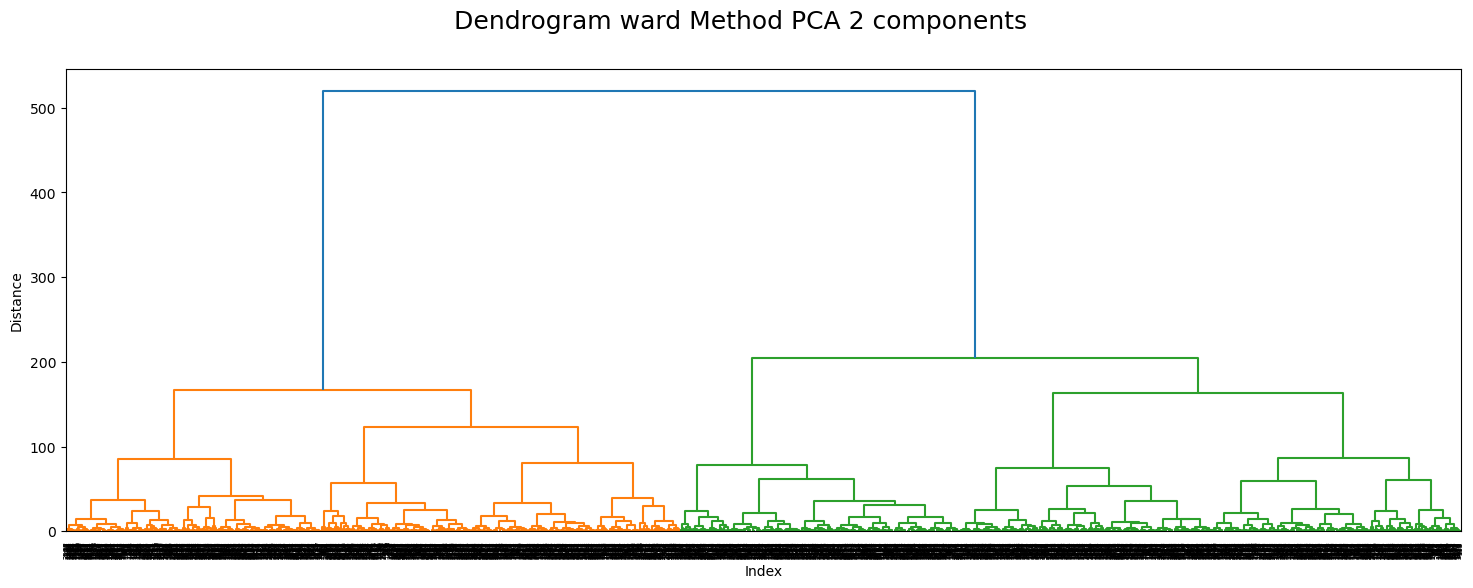

In [51]:
ward = linkage(df_pca_2,method="ward")
plt.figure(figsize=(18,6))
dendrogram(ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram ward Method PCA 2 components",fontsize=18)
plt.savefig(f'Dendrogram_Ward_Method_PCA2.png')

plt.show()

In [60]:
#Make a dataframe of the new components
dfPCA = pd.DataFrame(PCA_2, columns=['PCA1', 'PCA2'])

In [61]:
dfyear_copy_reset = dfyear_copy['cluster2'].reset_index(drop=True)

In [64]:
dfPCA['cluster2'] = dfyear_copy_reset

In [65]:
dfPCA

,PCA1,PCA2,cluster2
0,-11.754997,1.047682,1
1,-12.167245,1.509911,1
2,-13.394957,3.081810,1
3,-13.760719,2.099677,1
4,-11.834106,1.941176,1
...,...,...,...
3648,-9.501442,-6.203632,1
3649,-9.260253,-10.254401,1
3650,-8.770801,-7.481708,1
3651,-8.829877,-4.505832,1


C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jinu5\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


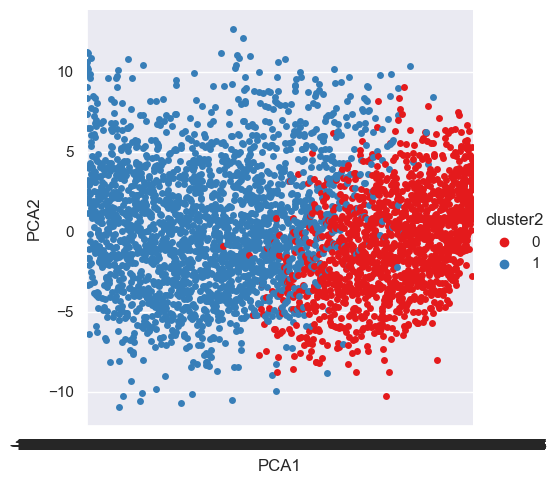

In [66]:
#PLot the two components, color coded by cluster (10 years total data from all observatories)
sns.set_theme()
g = sns.catplot(x="PCA1", y="PCA2", palette='Set1', hue="cluster2", data=dfPCA)
plt.savefig('pca_plot.png')  

In [67]:
#export dfPCA, 2011 - 2020, 10 years, 2 components
dfPCA.to_csv(os.path.join(path, 'dfPCA.csv'), index=False)

In [68]:
dfPCA.describe()

,PCA1,PCA2,cluster2
count,3653.000000,3.653000e+03,3653.000000
mean,0.000000,5.446262e-17,0.608541
std,7.059763,3.739997e+00,0.488144
min,-16.497111,-1.096004e+01,0.000000
25%,-6.444768,-2.677180e+00,0.000000
50%,0.055980,-1.885788e-01,1.000000
75%,6.082733,2.419857e+00,1.000000
max,16.878118,1.266952e+01,1.000000


In [70]:
dfyear.describe()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BELGRADE_cloud_cover,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
count,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,3653.000000,...,3653.000000,3653.0,3.653000e+03,3.653000e+03,3653.000000,3.653000e+03,3.653000e+03,3.653000e+03,3.653000e+03,3653.000000
mean,5.353682,0.739299,1.017775,1.465746,0.221599,5.024884,11.504462,7.132658,16.214180,3.834383,...,11.909225,5.0,8.200000e-01,1.014200e+00,1.120495,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,13.469368
std,2.283030,0.117287,0.007946,0.923146,0.487476,4.500597,7.304550,6.404757,8.641344,2.632616,...,8.778688,0.0,3.764171e-14,4.841235e-14,0.816489,1.882086e-14,2.225192e-13,3.908520e-14,4.832352e-13,0.424413
min,0.000000,0.360000,0.982700,0.120000,0.000000,0.000000,-12.400000,-19.300000,-8.800000,0.000000,...,-10.800000,5.0,8.200000e-01,1.014200e+00,0.020000,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,4.500000
25%,4.000000,0.660000,1.013200,0.660000,0.000000,0.500000,5.700000,2.100000,9.500000,2.000000,...,4.700000,5.0,8.200000e-01,1.014200e+00,0.430000,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,13.500000
50%,6.000000,0.750000,1.017500,1.320000,0.000000,4.300000,11.500000,7.200000,16.400000,4.000000,...,11.000000,5.0,8.200000e-01,1.014200e+00,1.060000,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,13.500000
75%,7.000000,0.830000,1.022600,2.220000,0.210000,8.700000,17.100000,12.300000,22.900000,6.000000,...,19.500000,5.0,8.200000e-01,1.014200e+00,1.590000,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,13.500000
max,8.000000,0.990000,1.044600,3.890000,5.440000,16.800000,29.200000,22.400000,37.400000,9.000000,...,33.500000,5.0,8.200000e-01,1.014200e+00,3.650000,4.100000e-01,3.400000e+00,1.070000e+01,7.900000e+00,13.500000


In [7]:
df_full = pd.merge(df, df_y, on='DATE', how='inner')


In [10]:
# Initialize the final DataFrame
data_for_tableau = pd.DataFrame()

# Loop through each location to create a sub-DataFrame
for location in locations:
    # Select columns for the current location and the 'DATE' column
    location_columns = [col for col in df_full.columns if col.startswith(location) or col == 'DATE']
    # Create new column names (retain 'DATE', but for others, use the part after the first '_')
    new_columns = ['DATE' if col == 'DATE' else col.split('_', 1)[1] for col in location_columns]
    # Create a sub-DataFrame with the selected columns
    sub_df = df_full[location_columns].copy()
    # Change the column names
    sub_df.columns = new_columns
    # Add a 'location' column
    sub_df['location'] = location
    # Append the current sub-DataFrame to the final DataFrame
    data_for_tableau = pd.concat([data_for_tableau, sub_df], axis=0, ignore_index=True)

# Reset the index of the final DataFrame to have a continuous index
data_for_tableau.reset_index(drop=True, inplace=True)

# Display the head of the final DataFrame for verification
print(data_for_tableau.head())

       DATE  cloud_cover  humidity  pressure  global_radiation  precipitation  \
0  19600101            7      0.85     1.018              0.32           0.09   
1  19600102            6      0.84     1.018              0.36           1.05   
2  19600103            8      0.90     1.018              0.18           0.30   
3  19600104            3      0.92     1.018              0.58           0.00   
4  19600105            6      0.95     1.018              0.65           0.14   

   sunshine  temp_mean  temp_min  temp_max  pleasant_weather location  
0       0.7        6.5       0.8      10.9                 0    BASEL  
1       1.1        6.1       3.3      10.1                 0    BASEL  
2       0.0        8.5       5.1       9.9                 0    BASEL  
3       4.1        6.3       3.8      10.6                 0    BASEL  
4       5.4        3.0      -0.7       6.0                 0    BASEL  


In [11]:
data_for_tableau.to_csv(os.path.join(path, 'data_for_tableau.csv'), index=False)